<a href="https://colab.research.google.com/github/elinteerie/Pytorch/blob/main/Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn


#Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

#Import Matplot lib for Visuals
import matplotlib.pyplot as plt

print(f' Pytorch Vrsion: {torch.__version__}')

 Pytorch Vrsion: 1.12.1+cu113


In [2]:
## Working with FashionMNIST

train_data = datasets.FashionMNIST(root ='data', train = True,
                                   download = True, transform = ToTensor(),
                                   target_transform=None)


test_data = datasets.FashionMNIST(root ='data', train = False,
                                   download = True, transform = ToTensor(),
                                   )

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
### Explore Dataset 

image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [5]:
len(train_data), len(train_data.targets), len(test_data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_names = train_data.classes

In [8]:
len(class_names)

10

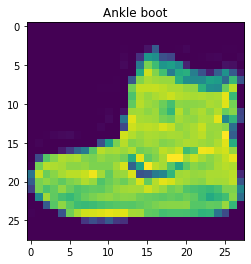

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze());
plt.title(class_names[label]);

###Prepare Data Loader

In [10]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(train_data, batch_size =BATCH_SIZE, shuffle = True)

test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = False)

In [11]:
len(train_loader), len(test_dataloader)

(1875, 313)

In [12]:
train_features_batch, train_label_batch = next(iter(train_loader))

In [13]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


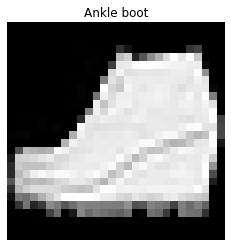

In [14]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [15]:
flatten_model = nn.Flatten()

In [16]:
image.shape

torch.Size([1, 28, 28])

In [17]:
flatten_model(image).shape

torch.Size([1, 784])

In [18]:
train_features_batch[0].shape

torch.Size([1, 28, 28])

In [19]:
output = flatten_model(train_features_batch[0])

In [20]:
output.shape

torch.Size([1, 784])

In [21]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_unit:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape, out_features=hidden_unit),
                                     nn.Linear(in_features=hidden_unit, out_features=output_shape))
  def forward(self, x):
    return self.layer_stack(x)

In [22]:
input_shape = 784 # 28 * 28
hidden_units = 10
output_shape = len(class_names)

In [23]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape = input_shape, 
                              hidden_unit =hidden_units,
                              output_shape=output_shape).to('cpu')

In [24]:
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [25]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 14.7 MB/s 


In [26]:
from torchmetrics import Accuracy, Precision

In [27]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.1)
accuracy = Accuracy()
precision = Precision()

### Create a Training Loop

In [28]:
from tqdm import tqdm

torch.manual_seed(42)

#Creating a Training Loop

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch} \n--')
  train_loss = 0
  ##Training
  ### Train Batches Loop
  for batch, (X, y) in enumerate(train_loader):
    model_0.train()
    #Forward Pass
    y_pred = model_0(X)

    ##Calculate the loss per batch
    loss = loss_fn(y_pred, y)
    acc = accuracy(y_pred, y)
    train_loss +=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    ##Print out what's going on
    if batch % 400 == 0:
      print(f' {batch} | {loss:.2f} | {acc} ')
  train_loss /= len(train_loader)


  ## testing loop
  test_losses = []
  test_accs = []
  model_0.eval()
  with torch.inference_mode():
    for i, (b, c) in enumerate(test_dataloader):
      #forward pass

      test_pred = model_0(b)

      test_loss = loss_fn(test_pred, c)
     
      test_acc = accuracy(test_pred, c)

      test_losses.append(test_loss)
      test_accs.append(test_acc)


    if i % 20 == 0:  
      print(f' Batch: {i} - Test Loss: {test_loss} - {test_acc:}')




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
--
 0 | 2.37 | 0.09375 
 400 | 0.64 | 0.71875 
 800 | 0.57 | 0.8125 
 1200 | 0.38 | 0.90625 
 1600 | 0.35 | 0.9375 


 33%|███▎      | 1/3 [00:08<00:17,  8.69s/it]

Epoch: 1 
--
 0 | 0.38 | 0.84375 
 400 | 0.68 | 0.71875 
 800 | 0.39 | 0.84375 
 1200 | 0.65 | 0.75 
 1600 | 0.27 | 0.90625 


 67%|██████▋   | 2/3 [00:20<00:10, 10.54s/it]

Epoch: 2 
--
 0 | 0.37 | 0.875 
 400 | 0.74 | 0.71875 
 800 | 0.29 | 0.90625 
 1200 | 0.40 | 0.875 
 1600 | 0.38 | 0.875 


100%|██████████| 3/3 [00:27<00:00,  9.20s/it]


In [29]:
test_acc, test_loss, train_loss

(tensor(0.9375), tensor(0.3298), tensor(0.4550, grad_fn=<DivBackward0>))

In [30]:
import numpy as np

test_loss = np.mean(test_losses)
test_loss

0.47663888

In [31]:
test_accuracy = np.mean(test_accs)
test_accuracy

0.8342652

In [32]:
test_prec = precision(test_pred, c)
test_prec

tensor(0.9375)

In [62]:

def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, accuracy_fn):
  '''
  Return a dictionary containing the model predicting on dataloader.
  '''

  loss = 0
  acc = 0
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_pred, y)

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'Model_name': model.__class__.__name__, 'model_loss': loss.item(),'model acc': acc.item()}



In [34]:
model_0.__class__.__name__

'FashionMNISTModelV0'

In [35]:
model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy)

In [36]:
model_0_results

{'Model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model acc': tensor(0.8343)}

In [37]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### Create a Non Linear Model

In [38]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, 
              hidden_units: int, 
              output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, 
        out_features =hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, 
        out_features=output_shape), 
        nn.ReLU())
    
  def forward(self, x):
    return self.layer_stack(x)


In [39]:
INPUT_SHAPE = 784
HIDDEN_UNITS = 10
OUTPUT_SHAPE = len(class_names)
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape=INPUT_SHAPE, hidden_units =HIDDEN_UNITS, output_shape =OUTPUT_SHAPE)

In [40]:
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [41]:
lossfn  = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.1)
accuracy_fn = Accuracy()

In [42]:
def train_step(model, dataloader, loss_fn, acccuracy_fn, optimizer):
  '''
  This Funtion takes 
  Args:
  Model 
  Dataloader
  Loss Function
  Accuracy Function
  Optimizer

  returns:
  the loss and Accuracy
  '''
  train_loss = 0
  train_accuracy = 0
  for batch,  (X, y) in enumerate(dataloader):
    model.train()
    X = X.to(device)
    y = y.to(device)
    model.to(device)
    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_accuracy += accuracy_fn(y_pred, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(dataloader)
  train_accuracy /= len(dataloader)
  print(f'Loss: {train_loss:.4f} | Accuracy: {train_accuracy:.4f} ')


def test_step(model, dataloader, loss_fn, acccuracy_fn, optimizer):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred, y)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    print(f'Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}  ')


In [43]:
epochs = 3
for epoch in range(epochs):
  model_train_results = train_step(model_1, train_loader, loss_fn, accuracy_fn, optimizer)
  model_test_results = test_step(model_1, test_dataloader, loss_fn, accuracy_fn, optimizer)


Loss: 1.0588 | Accuracy: 0.6219 
Test Loss: 0.9951 | Test Accuracy: 0.6413  
Loss: 0.9133 | Accuracy: 0.6640 
Test Loss: 0.9051 | Test Accuracy: 0.6686  
Loss: 0.8798 | Accuracy: 0.6725 
Test Loss: 0.8949 | Test Accuracy: 0.6647  


In [44]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)

In [45]:
model_1_results

{'Model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8948529958724976,
 'model acc': tensor(0.6647)}

### Build A Model with CNN TinyVGG

In [46]:
class FashionMNISTModelV2(nn.Module):

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, 
                  out_channels = hidden_units, 
                  kernel_size =3,
                  stride =1, 
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size = 3,
                  stride = 1, 
                  padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride = 2))
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding =1),
        nn.ReLU(),
        nn.MaxPool2d(2))
    
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features =hidden_units*7*7, out_features = output_shape)    )
  def forward(self, x):
    x = self.block_1(x)
    #print(x.shape)
    x = self.block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x



In [47]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape =1,
    hidden_units = 10,
    output_shape = len(class_names)
            ).to(device)

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [48]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [49]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
testi = conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

In [50]:
test_image.shape

torch.Size([3, 64, 64])

In [51]:
testi.shape

torch.Size([10, 62, 62])

In [52]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)
avg_pool_layer = nn.AvgPool2d(2)

In [53]:
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))

In [54]:
test_image_through_conv.shape

torch.Size([1, 10, 62, 62])

In [55]:
test_image_through_conv_and_avg_pool = avg_pool_layer(test_image_through_conv)

In [56]:
test_image_through_conv_and_avg_pool.shape

torch.Size([1, 10, 31, 31])

In [57]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr =0.1)
accuracy_fn = Accuracy()

In [58]:
epochs = 3

for epoch in range(epochs):
  train_step(model_2, train_loader, loss_fn, accuracy_fn, optimizer)
  test_step(model_2, test_dataloader, loss_fn, accuracy_fn, optimizer)



Loss: 0.6449 | Accuracy: 0.7661 
Test Loss: 0.4087 | Test Accuracy: 0.8517  
Loss: 0.3810 | Accuracy: 0.8635 
Test Loss: 0.3964 | Test Accuracy: 0.8536  
Loss: 0.3389 | Accuracy: 0.8783 
Test Loss: 0.3671 | Test Accuracy: 0.8733  


In [63]:
model_2_results = eval_model(model=model_2, data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn= accuracy_fn)

model_2_results

{'Model_name': 'FashionMNISTModelV2',
 'model_loss': 0.36707380414009094,
 'model acc': 0.873302698135376}

In [64]:
import pandas as pd
compare_results= pd.DataFrame([model_0_results, model_1_results, model_2_results])

In [65]:
compare_results

,Model_name,model_loss,model acc
0,FashionMNISTModelV0,0.476639,tensor(0.8343)
1,FashionMNISTModelV1,0.894853,tensor(0.6647)
2,FashionMNISTModelV2,0.367074,0.873303
